# Amazon Sales Data Analysis


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt


# Reading the data
sales_data = pd.read_csv(r"C:\Users\rajee\Downloads\Amazon Sales data.csv")

In [3]:
# Removing missing values
sales_data.dropna(inplace=True)

# printing some rows and column of data set
print(sales_data.head())

                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')


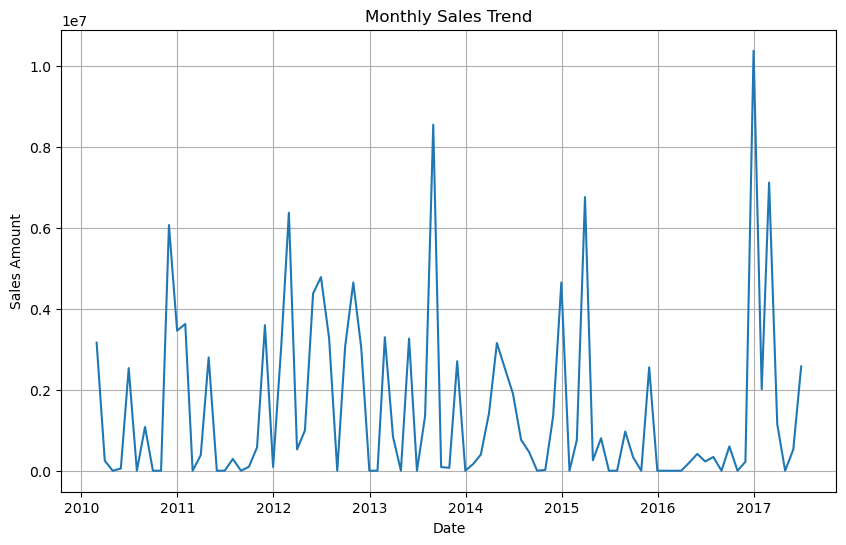

In [4]:
print(sales_data.columns)

sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'])
sales_data.set_index('Ship Date', inplace=True)

# Resample by month and sum the values
monthly_sales = sales_data.resample('M').sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Revenue'])  
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)  
plt.show()


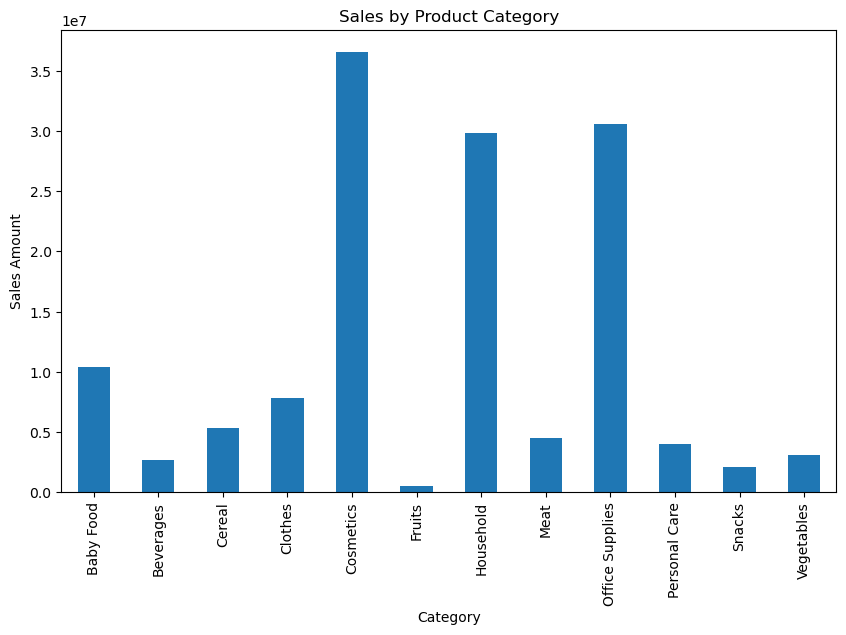

In [5]:
category_sales = sales_data.groupby('Item Type')['Total Revenue'].sum()
category_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Sales Amount')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

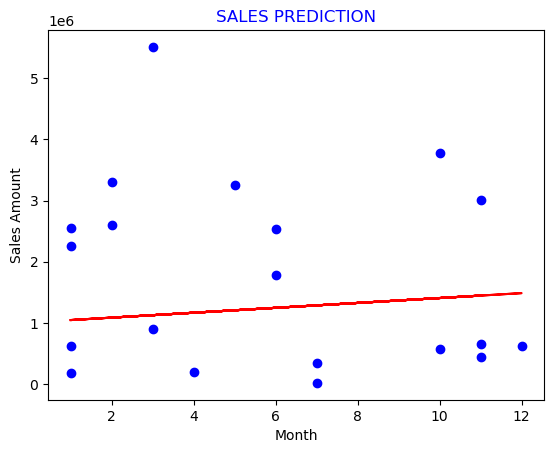

In [7]:
sales_data['month'] = sales_data.index.month
X = sales_data[['month']]
y = sales_data['Total Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('SALES PREDICTION',color='blue')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()

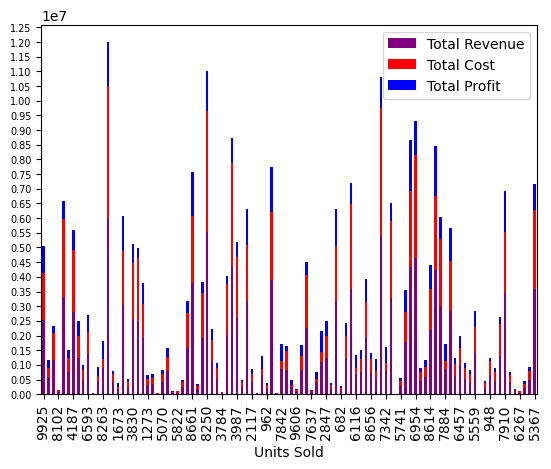

In [14]:
bar_plot = sales_data.plot.bar(x='Units Sold',y=['Total Revenue','Total Cost','Total Profit'],color=['purple','red','blue'],stacked=True,rot=True)
plt.xticks(rotation=90)
plt.locator_params(nbins=38)
plt.tick_params(axis='y', which='major', labelsize=7)

In [15]:
sales_data['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [16]:
items = ['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks']

In [17]:
sales_data['Item Type'] = pd.Categorical(sales_data['Item Type'],categories=items,ordered=True)

<Axes: xlabel='Item Type'>

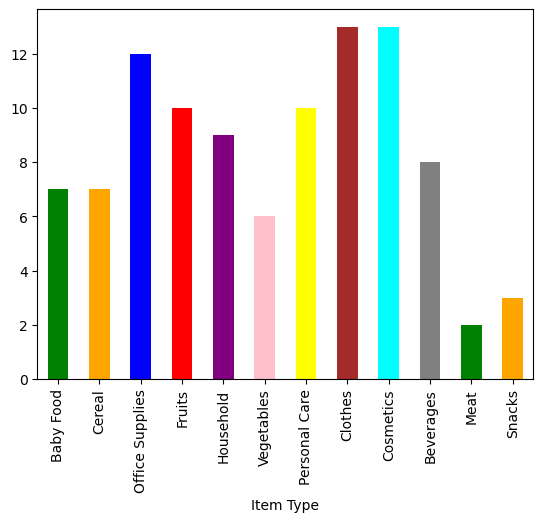

In [18]:
sales_data.groupby('Item Type')['Total Revenue'].count().plot(kind='bar',color=['green','orange','blue','red','purple','pink','yellow','brown','aqua','grey'])

<Axes: xlabel='Item Type'>

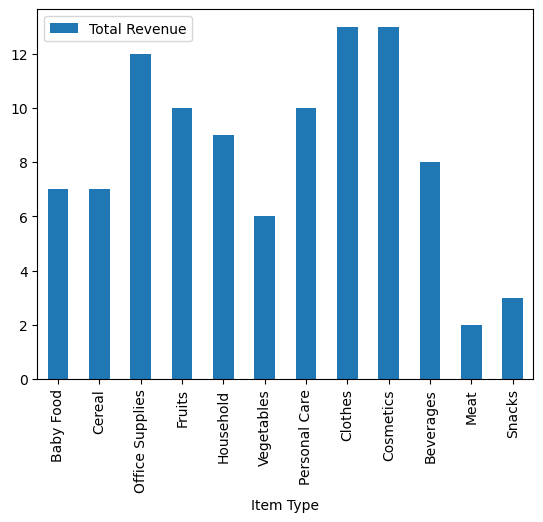

In [19]:
pd.pivot_table(sales_data,values='Total Revenue',index='Item Type',aggfunc='count').plot(kind='bar')

Text(0.5, 0, 'Units Sold')

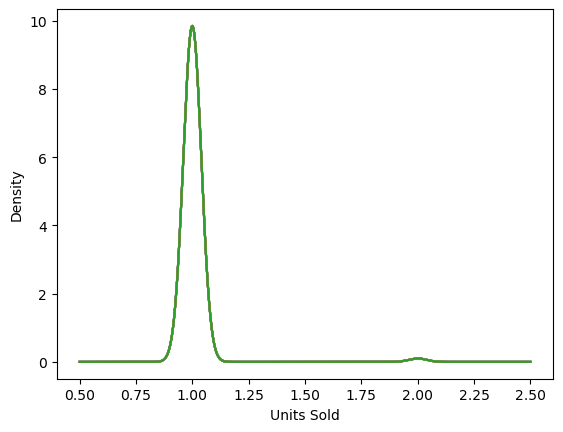

In [21]:
pd.pivot_table(sales_data,index='Units Sold',aggfunc='count').plot(kind='kde',stacked=True,legend=None)
plt.xlabel('Units Sold')

In [32]:
import seaborn as sns

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Australia and Oceania'),
  Text(1, 0, 'Central America and the Caribbean'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Sub-Saharan Africa'),
  Text(4, 0, 'Asia'),
  Text(5, 0, 'Middle East and North Africa'),
  Text(6, 0, 'North America')])

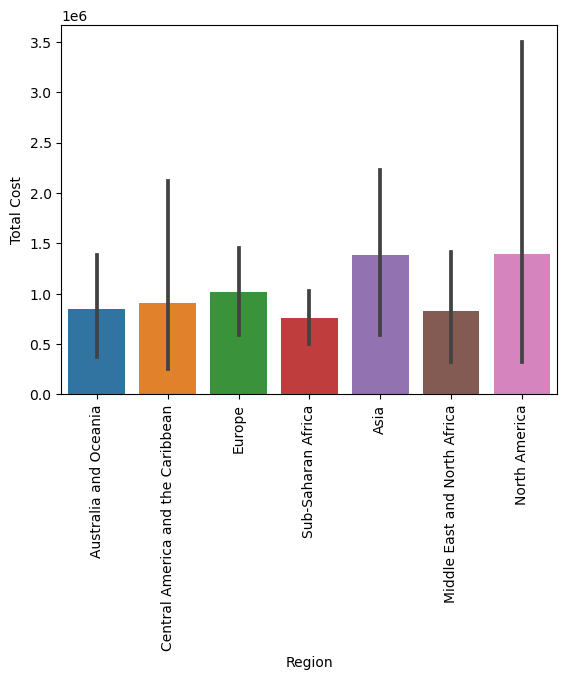

In [25]:
sn.barplot(x='Region',y='Total Cost',data=sales_data)
plt.xticks(rotation=90)

C:\Users\rajee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


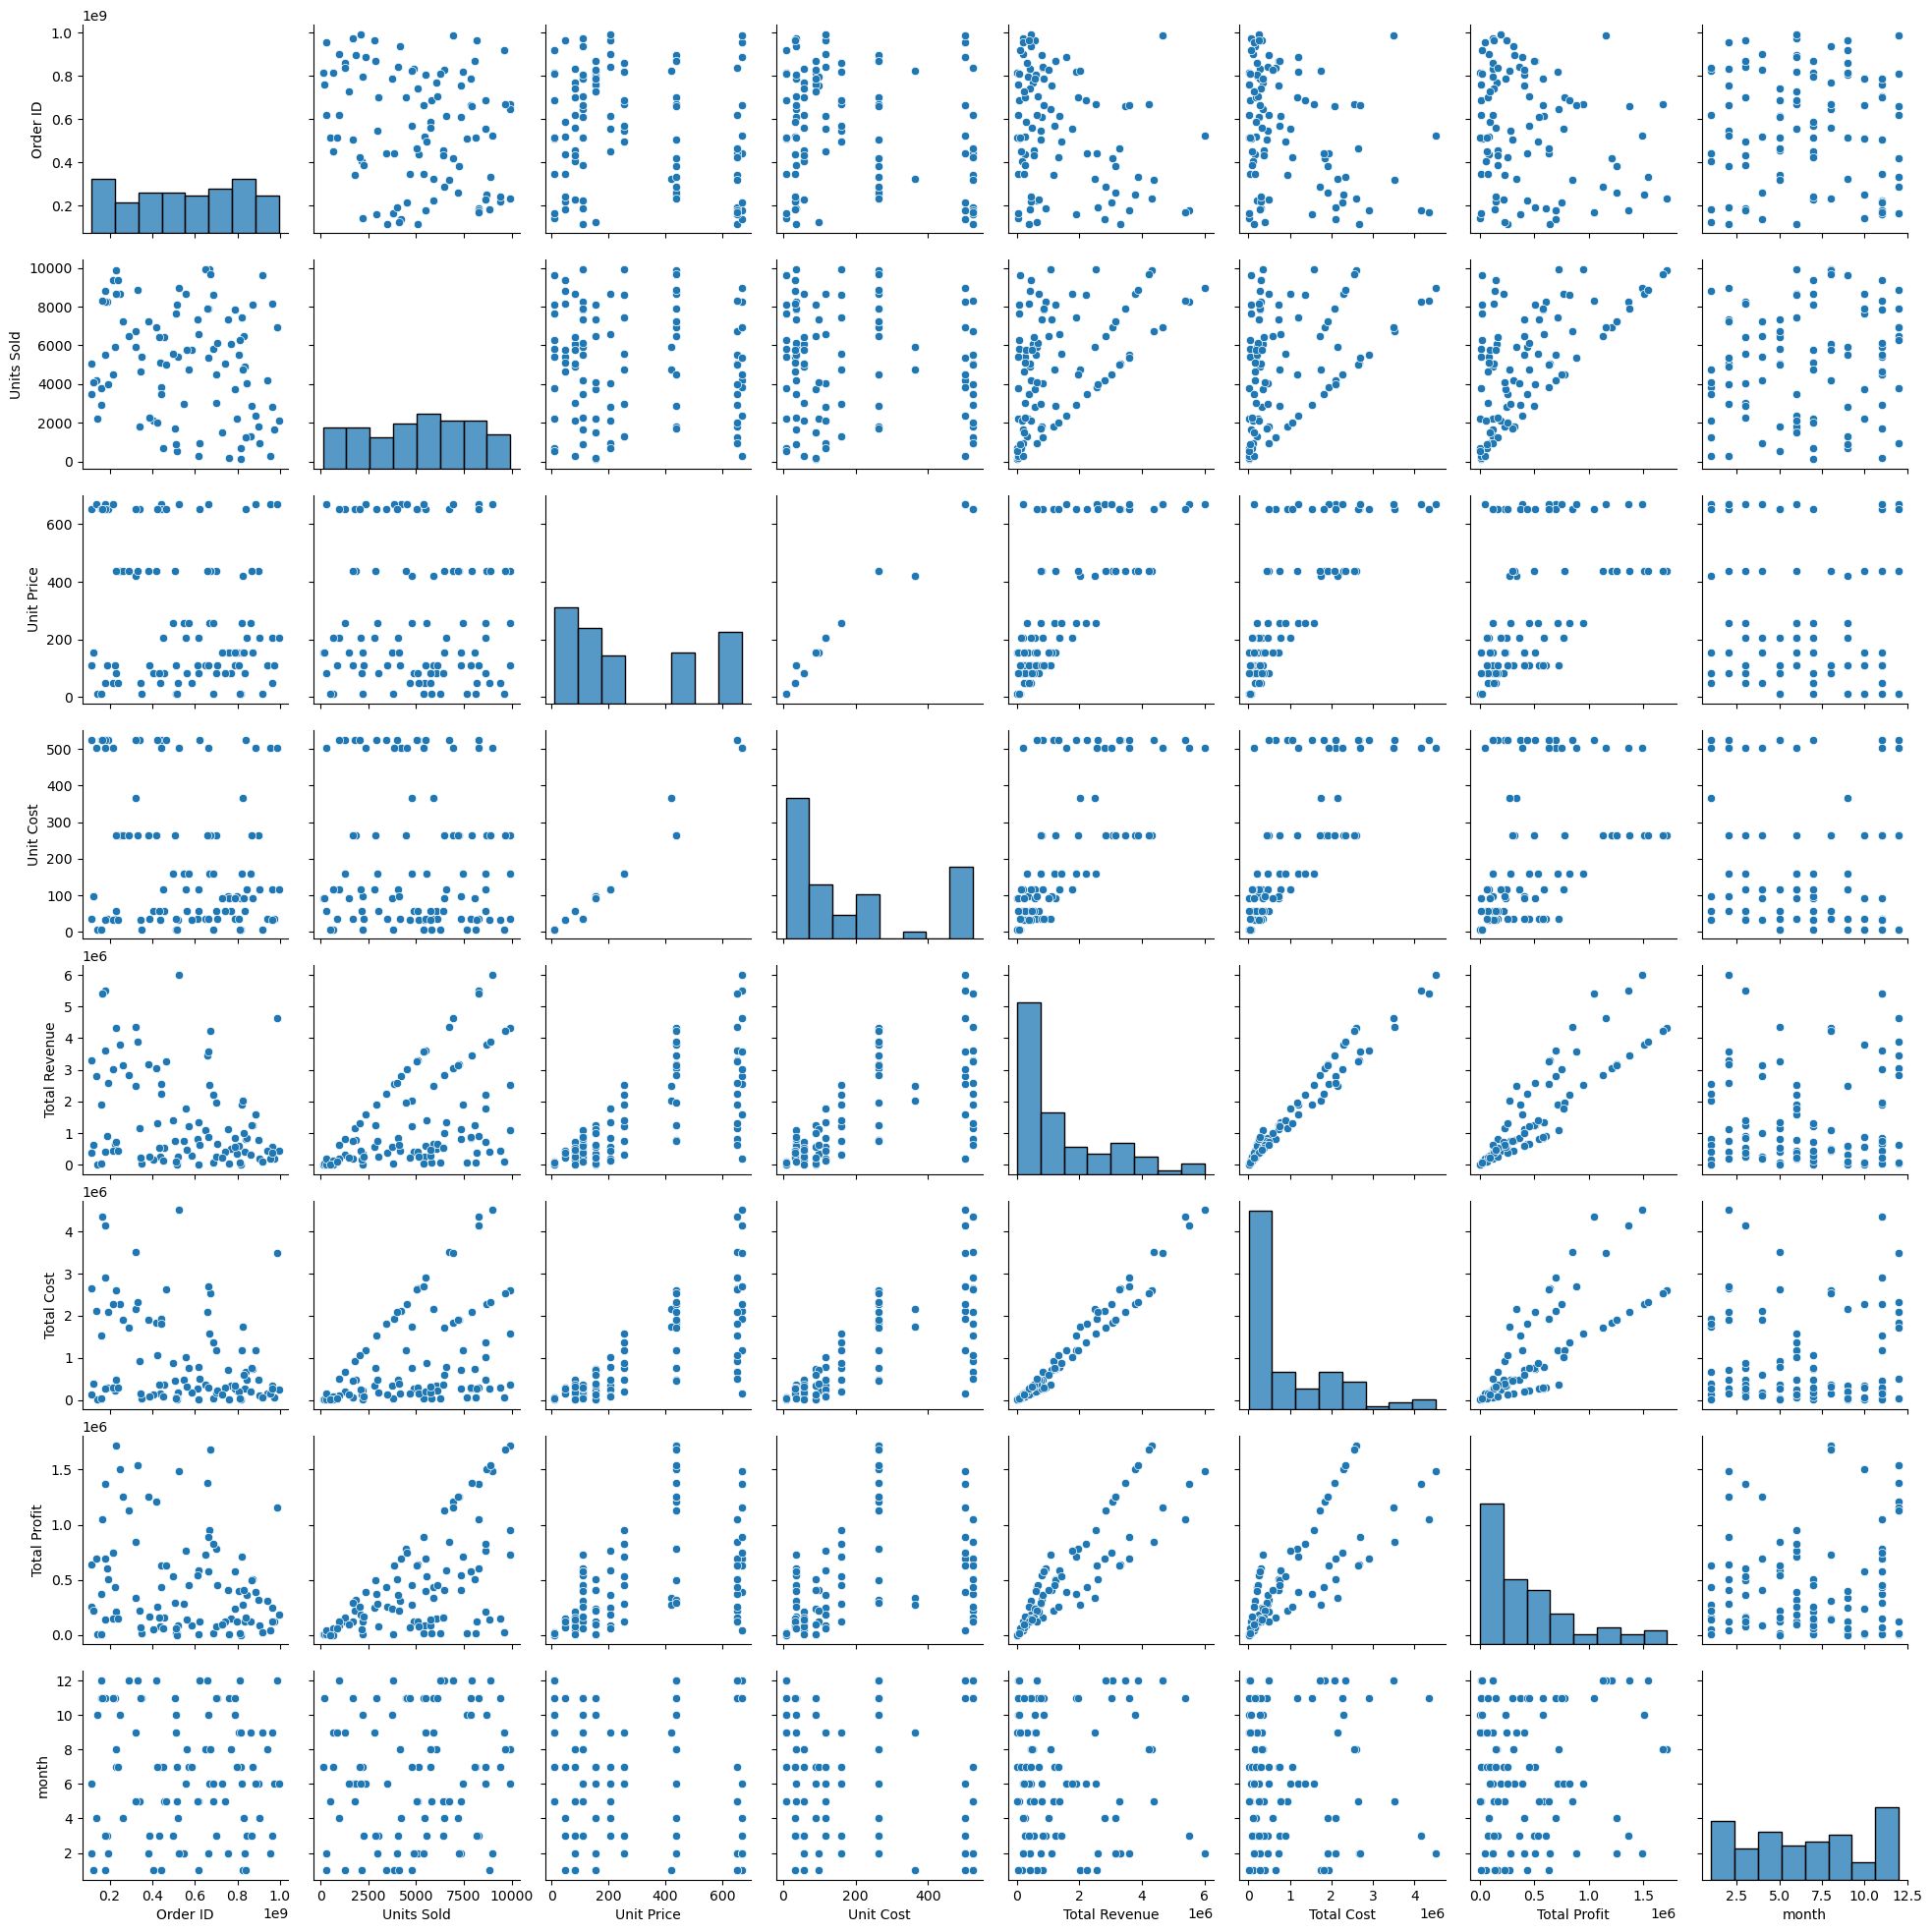

In [27]:
sn.pairplot(sales_data)

In [29]:
encoded_data = pd.get_dummies(sales_data)

In [30]:
correlation_matrix = encoded_data.corr()

<Axes: >

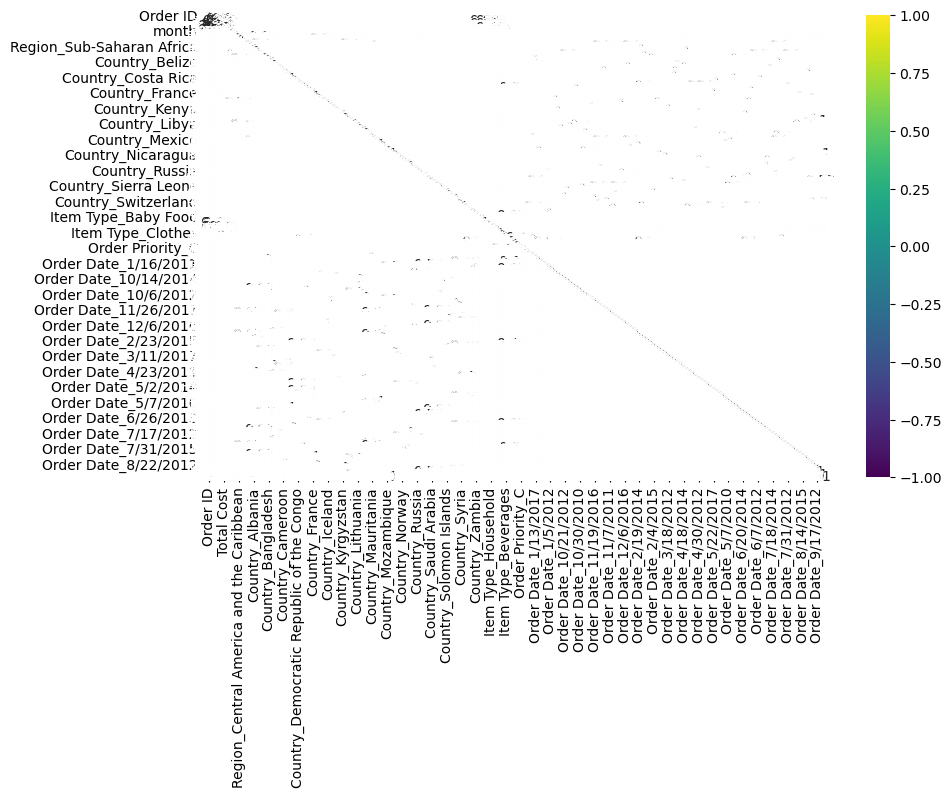

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

C:\Users\rajee\AppData\Local\Temp\ipykernel_19224\1053918290.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(x='Region',y='Total Cost',data=sales_data,ci=None)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Australia and Oceania'),
  Text(1, 0, 'Central America and the Caribbean'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Sub-Saharan Africa'),
  Text(4, 0, 'Asia'),
  Text(5, 0, 'Middle East and North Africa'),
  Text(6, 0, 'North America')])

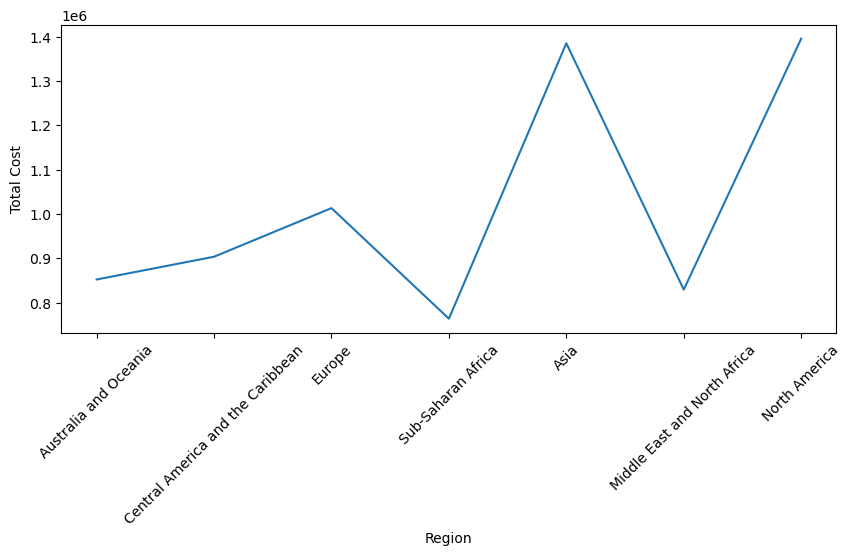

In [36]:
plt.figure(figsize=(10,4))
sn.lineplot(x='Region',y='Total Cost',data=sales_data,ci=None)
plt.xticks(rotation=45)

In [38]:

countries = ['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zambia', 'Kenya', 'Kuwait',
       'Slovenia', 'Romania', 'Nicaragua', 'Malaysia', 'Mozambique']

In [39]:
sales_data['Country'] = pd.Categorical(sales_data['Country'],categories=countries,ordered=True)

C:\Users\rajee\AppData\Local\Temp\ipykernel_19224\3112334453.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.barplot(x='Country', y='Total Revenue', data=sales_data, ci=None)


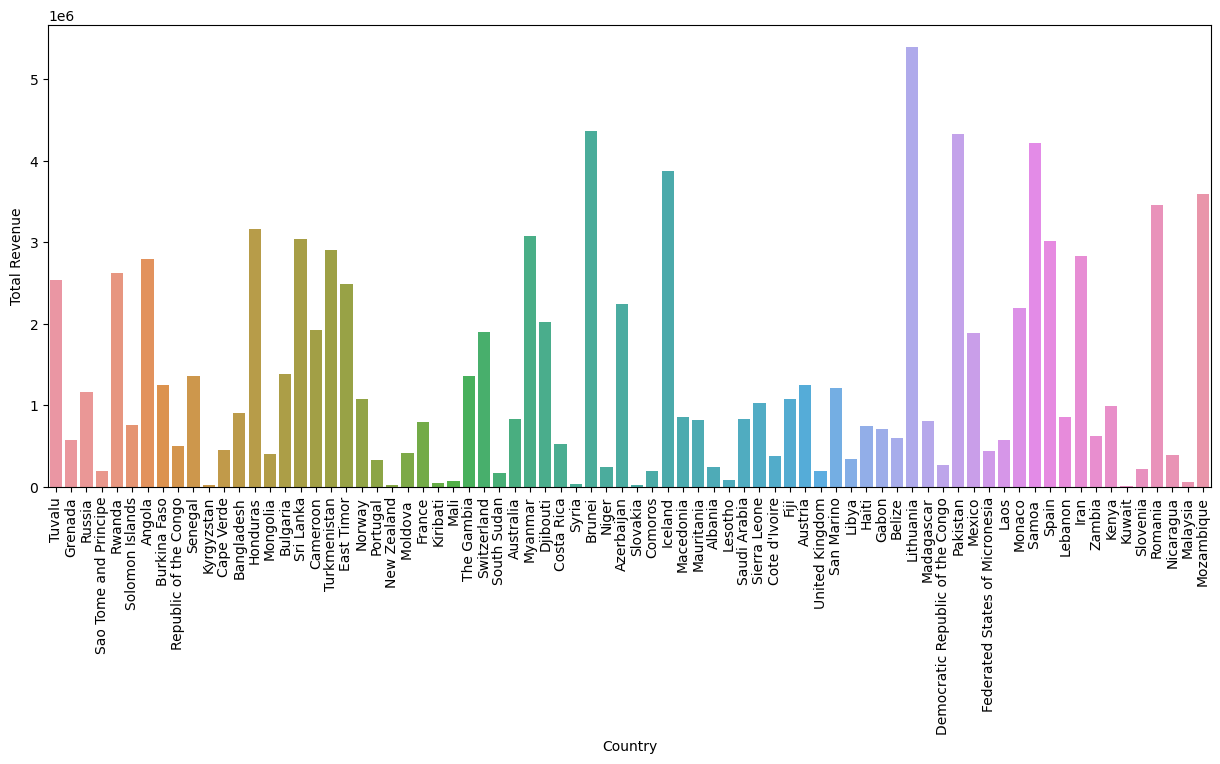

In [41]:
plt.figure(figsize=(15,6))
sn.barplot(x='Country', y='Total Revenue', data=sales_data, ci=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)